Task - 2 : Cuisine Combination

In [1]:
import pandas as pd

df = pd.read_csv("Dataset .csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

1. Identify the most common combinations of cuisines in the dataset.

In [2]:
df = df.dropna(subset=['Cuisines'])

df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(', '))

df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"[French, Japanese, Desserts]",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,[Japanese],...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
df['Cuisines_sorted'] = df['Cuisines'].apply(lambda x: sorted(x))
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines_sorted
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"[French, Japanese, Desserts]",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,"[Desserts, French, Japanese]"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,[Japanese],...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,[Japanese]
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",...,Yes,No,No,No,4,4.4,Green,Very Good,270,"[Asian, Filipino, Indian, Seafood]"


In [4]:
cuisine_combinations_counts = df['Cuisines_sorted'].value_counts().head(10)

top_combinations = cuisine_combinations_counts.head(10)

top_combinations

Cuisines_sorted
[North Indian]                      936
[Chinese, North Indian]             616
[Mughlai, North Indian]             394
[Fast Food]                         354
[Chinese]                           354
[Chinese, Mughlai, North Indian]    306
[Cafe]                              299
[Bakery]                            218
[Bakery, Desserts]                  181
[Chinese, Fast Food]                159
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt

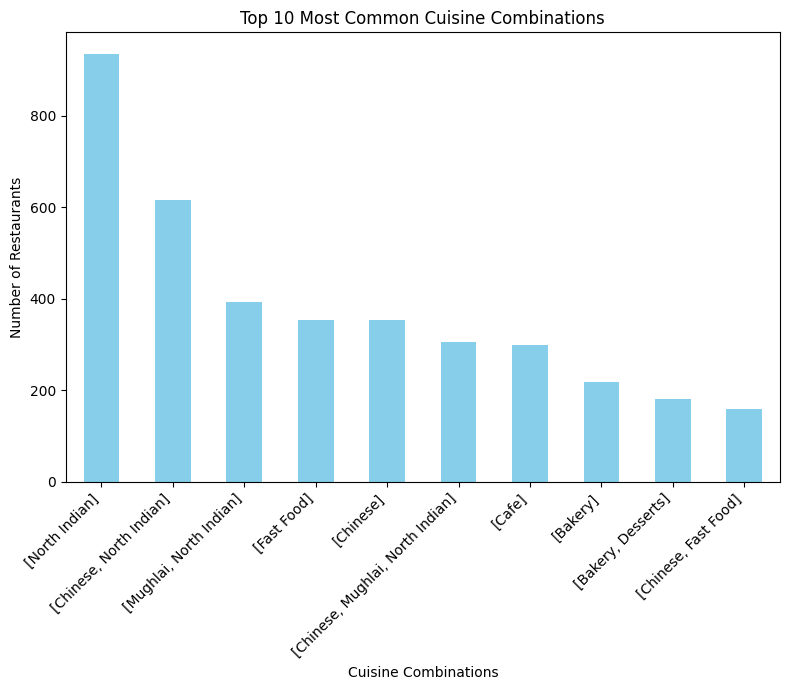

In [6]:
plt.figure(figsize=(8, 7))
top_combinations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.xlabel('Cuisine Combinations')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. Determine if certain cuisine combinations tend to have higher ratings.

In [7]:
df['Cuisines_str'] = df['Cuisines_sorted'].astype(str)
cui = df.groupby('Cuisines_str')['Aggregate rating'].mean()


In [8]:
cui.index = cui.index.str.strip("[]")

top_10_cuisines_rating = cui.nlargest(10)
print("Cuisine combinations tend to have higher ratings : ",top_10_cuisines_rating)

Cuisine combinations tend to have higher ratings :  Cuisines_str
'American', 'BBQ', 'Sandwich'            4.9
'American', 'Caribbean', 'Seafood'       4.9
'American', 'Coffee and Tea'             4.9
'American', 'Healthy Food', 'Mexican'    4.9
'American', 'Sandwich', 'Tea'            4.9
'Asian', 'European', 'Indian'            4.9
'BBQ', 'Breakfast', 'Southern'           4.9
'Bakery', 'Continental', 'Italian'       4.9
'Bar Food', 'Burger', 'Steak'            4.9
'Contemporary', 'European'               4.9
Name: Aggregate rating, dtype: float64
